# Bifurcation Analysis of the Sel'kov Glycolysis Model
How does varying the parameter $b$ affect system dynamics in the Sel'kov model of glycolysis? We can track fixed points, assess their stability, and visualize the bifurcation structure.

This project models the behavior of glycolysis when one of its parameters changes. The Sel’kov model uses two variables to represent concentrations of chemicals involved in sugar breakdown. These variables change over time based on feedback in the system.

The goal was to see how the system moves from stable behavior to rhythmic, repeating cycles—also known as oscillations. To do this, we used a method called bifurcation analysis. We slowly increased a parameter called $b$ and looked at how the system responded. For each value of $b$, we found the system's steady state and checked whether it was stable.

We found that for small values of $b$, the steady state is unstable and the system starts to oscillate. As we increased $b$, there was a clear point where the system became stable again. This point is called a Hopf bifurcation. We showed this change in a plot that marks stable and unstable values differently.

To double-check our results, we also simulated how the system changes over time at different $b$ values. When the system was unstable, the simulations showed smooth, regular cycles. When it was stable, the system settled to a constant value.

In the end, this project shows how a small change in one parameter can cause a big shift in behavior. Even simple models like this can explain real biological rhythms. This kind of analysis helps us understand how feedback and control work in living systems.

In [4]:
import sys
import os
sys.path.append(os.path.abspath("."))

import numpy as np
import matplotlib.pyplot as plt

from src.model import selkov
from src.solver import integrate_system
from src.continuation import find_fixed_point, stability_analysis

## Bifurcation Diagram: Fixed Points vs. b

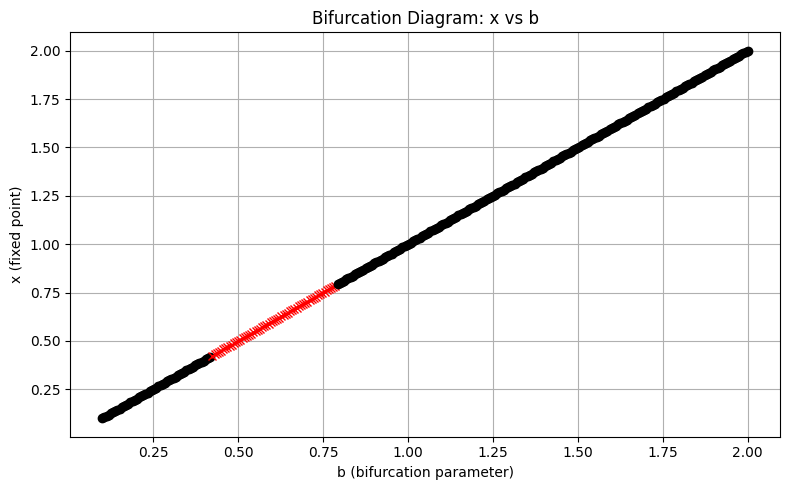

In [5]:
a = 0.1
b_vals = np.linspace(0.1, 2.0, 300)

x_fixed = []
stabilities = []

for b in b_vals:
    xy = find_fixed_point(a, b)
    eigs = stability_analysis(xy, a)
    x_fixed.append(xy[0])
    is_stable = np.all(np.real(eigs) < 0)
    stabilities.append(is_stable)

# Plotting
plt.figure(figsize=(8, 5))
for i, b in enumerate(b_vals):
    color = 'black' if stabilities[i] else 'red'
    marker = 'o' if stabilities[i] else 'x'
    plt.plot(b, x_fixed[i], marker, color=color)

plt.xlabel("b (bifurcation parameter)")
plt.ylabel("x (fixed point)")
plt.title("Bifurcation Diagram: x vs b")
plt.grid(True)
plt.tight_layout()
plt.show()

**Figure 1:**
This plot shows how the steady-state value of $x$ (ADP concentration) changes as the parameter $b$ increases. Each point represents a fixed point of the system. Black dots are stable fixed points, and red x’s are unstable ones. As $b$ increases, the system transitions from unstable to stable around $b = 0.7$, meaning the system goes from showing oscillations to settling at a constant value. This is a typical example of a Hopf bifurcation.

## Time-Domain Simulation for Representative Values of b

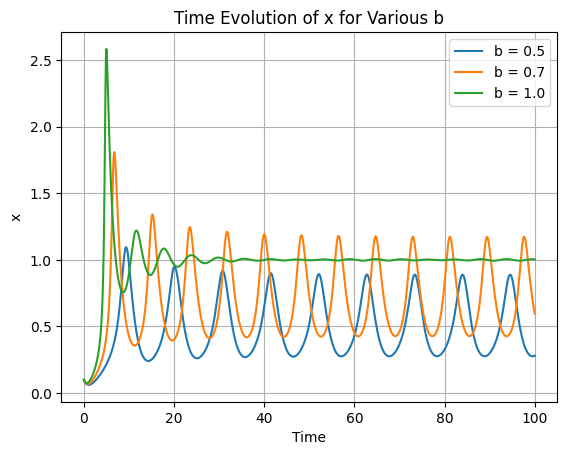

In [6]:
b_test_vals = [0.5, 0.7, 1.0]
for b in b_test_vals:
    sol = integrate_system(a, b, y0=[0.1, 0.1])
    plt.plot(sol.t, sol.y[0], label=f"b = {b}")

plt.title("Time Evolution of x for Various b")
plt.xlabel("Time")
plt.ylabel("x")
plt.legend()
plt.grid(True)
plt.show()

**Figure 2:**
This plot shows how the value of $x$ (ADP concentration) changes over time for different values of $b$. When $b = 0.5$ and $b = 0.7$, the system shows regular oscillations. This means the system doesn’t settle and keeps cycling. When $b = 1.0$, the oscillations disappear and the system slowly levels off at a steady value. This confirms the idea that increasing $b$ moves the system from oscillating behavior to a stable steady state.